In [10]:
from service.csv_parser import parse_package
from service.options import county_path, town_path

countyData = parse_package(county_path)
townData = parse_package(town_path)

/home/lvbubi/PycharmProjects/Accomodation/backend/service/csv_parser.py:40: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataframe.name = column_names[['id', 'title']]


In [11]:
import matplotlib.pyplot as plt
population = countyData[5]
munkanelkuli = countyData[0]
print(population.name)
print(munkanelkuli.name)

munkanelkuli_ferfi = munkanelkuli[['A', 'B', 'C', 'D']]
munkanelkuli_no = munkanelkuli[['E', 'F', 'G', 'H']]

munkanelkuli_ferfi_prob = munkanelkuli_ferfi.div(population['SUM(A)'], axis=0)
munkanelkuli_ferfi_prob.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
#plt.matshow(munkanelkuli_ferfi_prob.corr(method='pearson'), cmap='coolwarm')
#plt.show()

                                                   id title
21  Állandó népesség, férfiak összesen (dec. 31.),...     A
22  Állandó népesség, nők összesen (dec. 31.), 201...     B
                                                   id title
21  Teljes munkaidőben foglalkoztatott férfi, 15-2...     A
22  Teljes munkaidőben foglalkoztatott férfi, 15-6...     B
23  Teljes munkaidőben foglalkoztatott férfi, 25-5...     C
24  Teljes munkaidőben foglalkoztatott férfi, 55-6...     D
25  Teljes munkaidőben foglalkoztatott nő, 15-24 é...     E
26  Teljes munkaidőben foglalkoztatott nő, 15-64 é...     F
27  Teljes munkaidőben foglalkoztatott nő, 25-54 é...     G
28  Teljes munkaidőben foglalkoztatott nő, 55-64 é...     H


,A,B,C,D
A,1.0,-0.076,-0.21,-0.13
B,-0.076,1.0,0.97,0.71
C,-0.21,0.97,1.0,0.57
D,-0.13,0.71,0.57,1.0


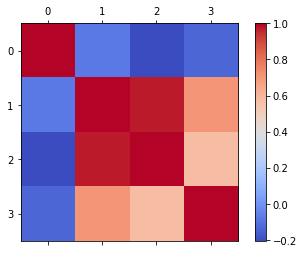

In [12]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
cax = ax.matshow(munkanelkuli_ferfi_prob.corr(method='pearson'), cmap='coolwarm')
#ax.xticklabels=iris[1:4]
fig1.colorbar(cax)
plt.show()

In [13]:
import folium as folium


def create_map(data, filename):
    # Make an empty map
    m = folium.Map(location=[47.509113, 19.0282913], tiles="OpenStreetMap", zoom_start=7)

    # I can add marker one by one on the map
    for i in range(0, len(data)):
        folium.Circle(
            location=[data.iloc[i].coordinate[1], data.iloc[i].coordinate[0]],
            popup=data.iloc[i]['title'],
            radius=int(data.iloc[i]['A']),
            color='crimson',
            fill=True,
            fill_color='crimson'
        ).add_to(m)

    # Save it as html

    m.save(filename)

In [16]:
from service.coordinate_service import add_coordinates_to_town

model = add_coordinates_to_town(countyData[0])

create_map(model, 'mymap.html')